# CSC483 Project 1: Intro to Images
## OpenCV, matplotlib and numpy

The purpose of this assignment is to get you familiar with some rudimentary image processing techniques, beginning with parsing an image file and ending with pixel-level operations.   In the process you'll gain some experience with the following:

* using gitlab and git
* using jupyter notebooks
* manipulating numpy arrays
* the basics of image formats
* greyscale conversion
* thresholding
* histogram generation

### Step 0: Setup

You'll need jupyter notebooks, openCV and numpy installed for this project.  All of this software should be installed on CS department machines, but you'll have to undertake your own journey if you choose to install it on your personal machine.  Use slack as a resource!

You'll be writing the bulk of your code in *project1.py*, and testing it inside of this notebook.  I've written placeholder stubs for many, but not all of the functions you'll need. The nice thing about this assignment is that you'll know things work if they look good (mostly, at least).

I will have given you a brief jupyter notebook tutorial, and we'll be doing some hands-on work in Olin 107 this Thursday.  

*** Warning ***: this will be a challenging assignment, don't procrastinate!

* Clone the csc483 repo, as instructed by nexus
* Create your own (separate) csc483 project, named csc483-username, and clone it into an empty directory
* copy the project-1 directory from the class repo into your personal repo, as well as the images directory
    * be sure to add, commit, and push the new files

In [1]:
#you'll need to re-run this cell every time you change your project 1 file
from project1 import *

### Part 1:  Load a ppm file

The netbpm portable pixel format (ppm) is a venerable graphics extenstion.  We'll be using it for this assignment because (a) it is uncompressed and (b) it is ascii format.  You can find descriptions of the file format online.  

Start by looking at  *zebra.ascii.ppm* with a plan text editor (typing "top zebra.ascii.ppm" from the terminal should suffice).  What does it look like?

Finish writing loadppm(), starter code of which is defined in *project1.py*

Restrictions:
* you must write the parser from scratch!
* specifically: you may not use OpenCV or PIL no parse the file
* you'll need to learn a bit about numpy arrays, how to create them.

Hints:
* pixel values should range from 0..255.  When loading them into an nparray, you should be sure to set the data type as 'uint8'.  
* you may find the numpy.dstack() function very useful!

Testing:
* Run the test code below.  It should show two rows of colors.  The first row should contain RED, GREEN, BLUE (left to right).  The second row should contain YELLOW, WHITE, BLACK

And this should correclty load a zebra.  Well, a picture of a zebra at least.

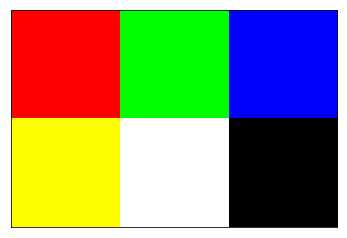

In [2]:
rgb = loadppm("../images/simple.ascii.ppm")
plt.xticks([]), plt.yticks([]) # to hide tick values on X and Y axis

#uncomment the lines below to test
plt.imshow(rgb)
plt.show()

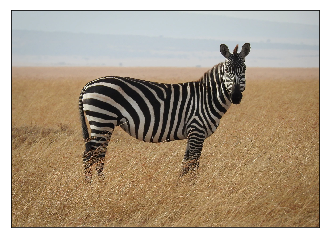

In [3]:
rgb = loadppm("../images/zebra.ascii.ppm")
plt.xticks([]), plt.yticks([])   # to hide tick values on X and Y axis

#uncomment below to test
plt.imshow(rgb)
plt.show()

### Part 2: Separating Colors

Now I want you to implement functions to just separate the red, green, and blue channels out of the image.  

Hint: You may want to use the np.split() function.

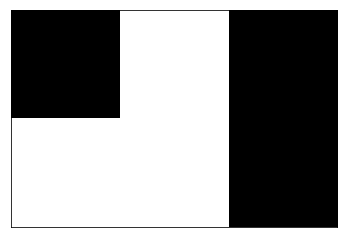

In [4]:
rgb = loadppm("../images/simple.ascii.ppm")
green = GetGreenPixels(rgb)

#you know the routine
plt.xticks([]), plt.yticks([])   # to hide tick values on X and Y axis
plt.imshow(green,cmap='gray', vmin=0, vmax=255)
plt.show()

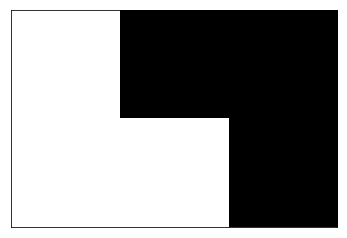

In [5]:
'home.jpgred = GetRedPixels(rgb)
plt.xticks([]), plt.yticks([])   # to hide tick values on X and Y axis
plt.imshow(red,cmap='gray', vmin=0, vmax=255)
plt.show()

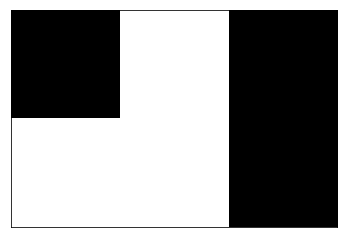

In [6]:
blue = GetBluePixels(rgb)
plt.xticks([]), plt.yticks([])   # to hide tick values on X and Y axis
plt.imshow(green,cmap='gray', vmin=0, vmax=255)
plt.show()

# Part 3: Converting to Greyscale (naive)

Next up, create a greyscale image by averaging the red, green, and blue pixel values of the image together to create a single "flat" 2D image.  Note that you'll have to normalize the final values to the range 0..255.  Test your function on the same images as above.  Note that there are much "better" ways of converting to greyscale.

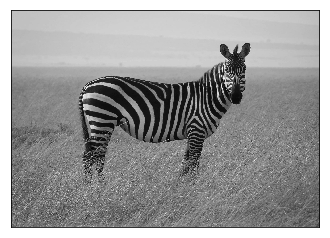

In [5]:
#code to test greyscale conversions of the colored boxes and the zebra
rgb = loadppm("../images/zebra.ascii.ppm")
grey = GetGrey(rgb)
plt.xticks([]), plt.yticks([])   # to hide tick values on X and Y axis
plt.imshow(grey,cmap='gray', vmin=0, vmax=255)
plt.show()

# Part 4: Thresholding

Now, starting with your greyscale image, us a simple thresholding algorithm to convert to a monochrome black/white image.  For starters, use values < 128 as black, and those >= 128 as white.  Play around with a couple of values, test and display below.

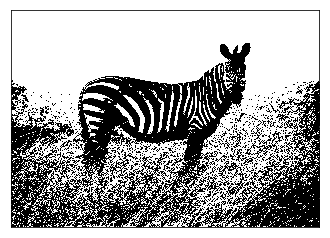

In [2]:
#code to create black/white monochrome image
rgb = loadppm("../images/zebra.ascii.ppm")
thre = Threshold(rgb)
plt.xticks([]), plt.yticks([])   # to hide tick values on X and Y axis
plt.imshow(thre,cmap='gray', vmin=0, vmax=255)
plt.show()

# Part 5: Histogram Generation and Normalization 

Following Section 3.1.4 of the textbook, and Thursday's lecture notes, write and test code to do the following for the greyscale zebra image:

* calculate the histogram of the greyscale image
* calculate the cumulative distribution c(I) of the histogram values
* rescale the greyscale values accordingly 

Display your image below

[[194 194 194 ... 186 185 185]
 [194 194 194 ... 186 186 186]
 [194 194 194 ... 185 185 183]
 ...
 [106 105 111 ...  98 103  93]
 [ 89 103 108 ... 101  93  89]
 [103 123 115 ... 103 100 106]]
[12, 14, 44, 52, 58, 89, 95, 127, 140, 178, 306, 560, 1632, 1551, 2301, 5555, 4829, 4085, 9503, 8422, 5941, 10589, 6031, 3279, 3092, 3281, 2138, 3085, 2298, 1804, 1526, 1591, 1431, 1877, 1237, 1150, 1270, 1161, 858, 1200, 1059, 931, 1164, 860, 749, 755, 917, 752, 973, 731, 667, 582, 702, 754, 780, 678, 679, 774, 750, 713, 784, 705, 744, 907, 768, 747, 835, 926, 960, 1055, 1008, 1014, 1118, 1208, 1288, 1380, 1339, 1444, 1755, 1670, 1767, 1894, 1928, 2100, 2298, 2530, 2638, 3157, 2952, 3491, 3155, 3666, 3913, 4580, 4373, 4558, 4573, 5400, 5137, 6098, 5579, 5957, 6699, 6406, 6715, 7179, 7467, 7775, 8990, 7735, 8459, 7989, 9157, 9793, 10639, 10032, 10190, 10044, 10631, 11472, 11672, 11831, 12713, 15542, 11625, 11883, 14082, 14386, 15735, 17970, 14746, 15285, 12831, 15519, 17255, 17610, 15204, 15025, 1

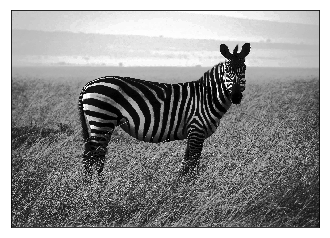

In [3]:
rgb = loadppm("../images/zebra.ascii.ppm")
his = Histogram(rgb)
plt.xticks([]), plt.yticks([])   # to hide tick values on X and Y axis
plt.imshow(his,cmap='gray', vmin=0, vmax=255)
plt.show()

### Part 6:  Bonus

Take a look at the checkerboard ppm provided in the images directory.  Using your tools (and any new ones), tell me what color the boxes labeled A and B are, and find a way to process the image to make this more clear.

# Portfolio Ideas:

* Normalize Each Color Channel, rather than the Greyscale
* Create a greyscale conversion function that weights colors more realistically.
* Ask John for some Satellite Images of the Amazon, and see if you can make a rudimentary measure of the amount of leaf cover in each image.